# Capstone Project: House Value Analysis and Projections for 2-story, Single-Family Homes and Chage Produced by Finishing Basement Space

## Author: Amber Speer

## Code Sources

### Ken Jee - Data Project from Scratch video series
[Video Link](https://www.youtube.com/watch?v=7O4dpR9QMIM)
[GitHub Repo Link](https://github.com/PlayingNumbers/ds_salary_proj)
    
### GreekDataGuy
    https://towardsdatascience.com/productionize-a-machine-learning-model-with-flask-and-heroku-8201260503d2    
    


# Import needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection

# Although this code works fine now, originally several "future warnings" came up.  This will suppress the warnings for better readablity.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the Data

In [3]:
### Read csv
df = pd.read_csv("train.csv")
print (df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# Explore the Data

## Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Description

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Histogram of each feature

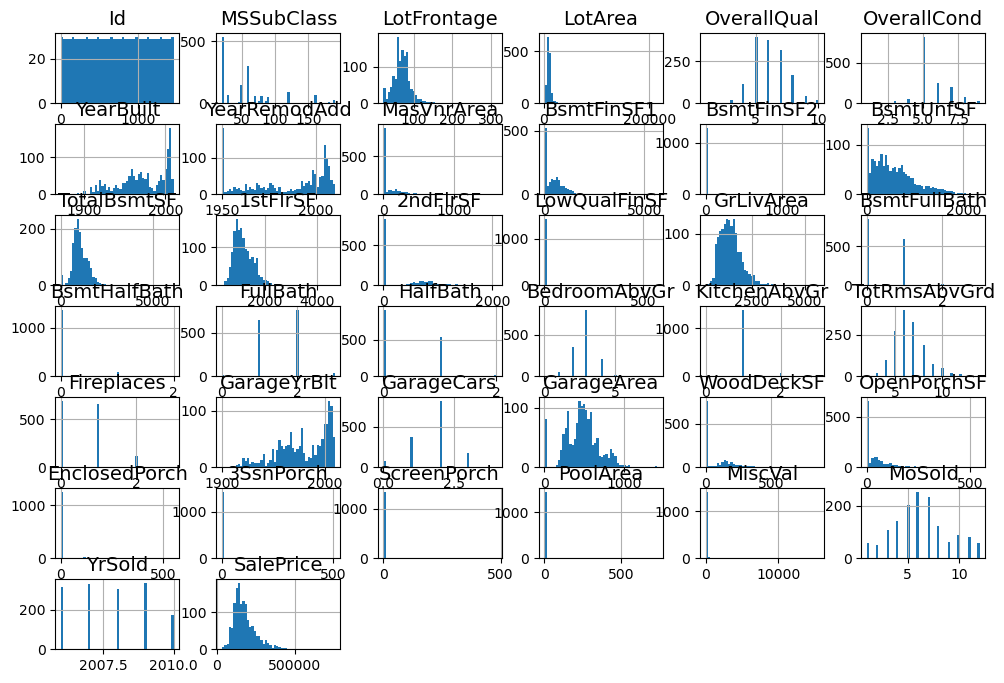

In [6]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.savefig("attribute_histogram_plots")  # extra code
plt.show()

## Data Columns

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Find Correlations

### Correlation Matrix

In [4]:
corr_matrix = df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# Clean the Data

## Drop duplicates

In [9]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.info()
# No duplicates found to remove

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Check for null values

In [12]:
# Check for null values
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [13]:
# Percentage of null values
df.isnull().sum()/df.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

## Reduce features

### Take out all records except MSSubClass: 60, 75, and 160

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
(Definitions from data_description.txt file that was downloaded with the dataset.)

Only MSSubClass 60, 75, and 160 would be comperable to the study house.

In [14]:
df[df.MSSubClass != 20]
df[df.MSSubClass != 30]
df[df.MSSubClass != 40]
df[df.MSSubClass != 45]
df[df.MSSubClass != 50]
df[df.MSSubClass != 70]
df[df.MSSubClass != 80]
df[df.MSSubClass != 85]
df[df.MSSubClass != 90]
df[df.MSSubClass != 120]
df[df.MSSubClass != 150]
df[df.MSSubClass != 180]
df[df.MSSubClass != 190]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### More data cleaning in Excel and Power Query
1) Open train.csv in Power Query
2) Remove records with MSSubClass that are not 60, 70, or 160
3) Remove Features that do not apply to the study house or are not believed to be large contributors to the sale price based on correlation:
    - Id, MSZoning, LotFrontage, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood,
        Condition1, Condition2, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond,
        BsmtQual, BsmtCond, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, Heating, HeatingQC, CentralAir, Electrical,
        1stFlrSF, 2ndFlrSF, LowQualFinSF, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu,
        GarageType, GarageYrBlt, GarageFinish, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF,
        EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, SaleType
        
4) Remove SaleConditions: Abnorml and Family because these are not going to represent fair market prices.

5) Add helpful features
    - TotalBath = FullBath + (HalfBath/2) + BsmtFullBath + (BsmtHalfBath/2)
    - BedroomsRatio = BedroomAbvGr/TotRmsAbvGrd
    - TotalFinSF = GrLivArea + TotalBsmtSF - BsmtUnfSF
    
6) Save the Excel workbook and the svae the data as cleantrain.csv
    
    
    

## Import and Explore Clean Data

### Import cleandata.csv

In [98]:
data = pd.read_csv("cleantrain.csv")

### Find correlations

In [5]:
corr_matrix = data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

NameError: name 'data' is not defined

### Plot correlations on scatter matrix

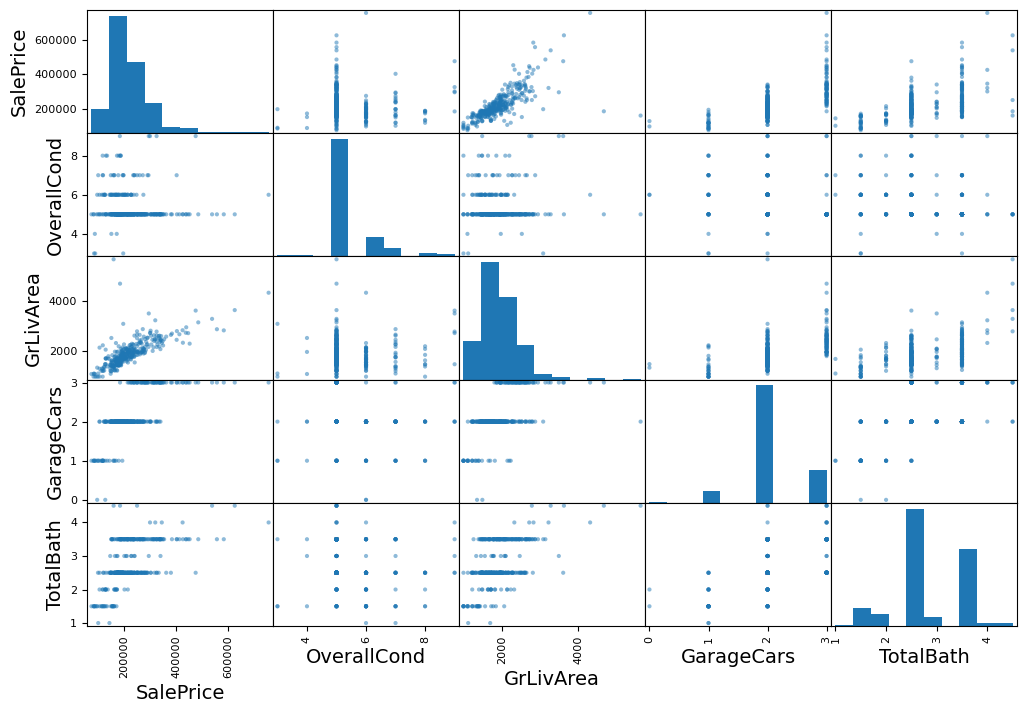

In [101]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallCond", "GrLivArea",
              "GarageCars", "TotalBath"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

### Explore unique and null values

#### Find number of unique values in each column

In [102]:
data.nunique()

MSSubClass         3
LotArea          315
BldgType           3
OverallCond        7
YearBuilt         57
YearRemodAdd      46
Age               57
Remodel Age       46
Foundation         5
BsmtUnfSF        279
BsmtFinSF        205
TotalBsmtSF      256
GrLivArea        294
TotalFinSF       318
BsmtFullBath       3
BsmtHalfBath       2
FullBath           3
HalfBath           3
TotalFullBath      4
TotalHalfBath      4
TotalBath          8
BedroomAbvGr       4
TotRmsAbvGrd       9
GarageCars         4
MoSold            12
YrSold             5
SalePrice        257
dtype: int64

#### What unique values are in OverallCond?

In [103]:
data['OverallCond'].unique()

array([5, 6, 8, 9, 7, 4, 3], dtype=int64)

#### What unique values are in Foundation?

In [104]:
data['Foundation'].unique()

array(['PConc', 'CBlock', 'Slab', 'Wood', 'BrkTil'], dtype=object)

#### Check for null values

In [105]:
data.isnull().sum()

MSSubClass       0
LotArea          0
BldgType         0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Age              0
Remodel Age      0
Foundation       0
BsmtUnfSF        0
BsmtFinSF        0
TotalBsmtSF      0
GrLivArea        0
TotalFinSF       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
TotalFullBath    0
TotalHalfBath    0
TotalBath        0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageCars       0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Narrow dataset to only needed columns

In [7]:
houses = data.drop(['MSSubClass', 'BldgType', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
houses.head(n=15)
houses.tail(n=15)


NameError: name 'data' is not defined

In [108]:
houses.tail(n=15)

,LotArea,OverallCond,YearBuilt,YearRemodAdd,Age,Remodel Age,Foundation,BsmtFinSF,TotalFinSF,TotalFullBath,TotalHalfBath,TotalBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold,SalePrice
342,10237,5,2005,2007,6,4,PConc,0,1484,2,1,2.5,3,8,2,7,2007,178900
343,8125,5,2006,2006,5,5,PConc,0,1576,2,1,2.5,3,6,2,8,2006,197000
344,8846,5,2005,2006,6,5,PConc,0,1500,2,1,2.5,3,6,2,8,2006,173900
345,16056,5,2005,2006,6,5,PConc,240,3108,3,1,3.5,4,11,3,7,2006,556581
346,23257,5,2006,2006,5,5,PConc,0,2021,2,1,2.5,3,9,2,9,2006,274725
347,9965,5,2006,2007,5,4,PConc,1150,3978,4,0,4.0,4,11,3,4,2007,424870
348,14054,5,2006,2006,5,5,PConc,0,1863,2,1,2.5,4,9,3,11,2006,219210
349,8125,5,2005,2006,6,5,PConc,0,1553,2,1,2.5,3,6,2,3,2006,186500
350,11065,5,2006,2006,5,5,PConc,0,1970,2,1,2.5,3,8,3,10,2006,281000
351,63887,5,2008,2008,3,3,PConc,5644,11286,4,1,4.5,3,12,2,1,2008,160000


In [109]:
houses.shape

(357, 18)

### Relationship Analysis

In [6]:
correlation = houses.corr()

NameError: name 'houses' is not defined

#### Heatmap

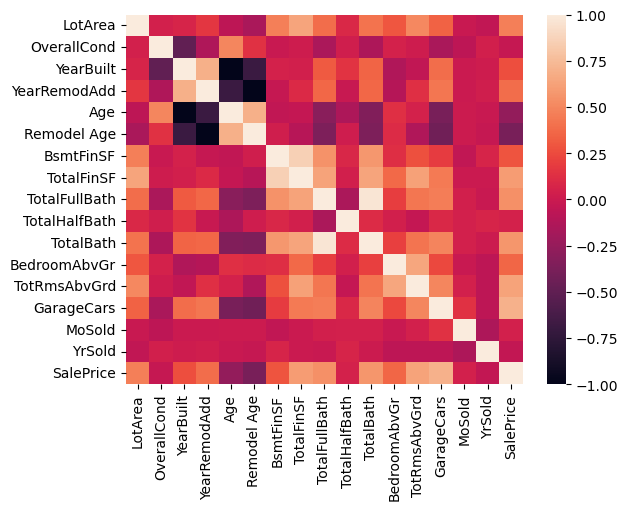

In [111]:
sns.heatmap(correlation)
plt.savefig("heatmap", bbox_inches='tight', pad_inches=0.5)

#### Pairplot Charts

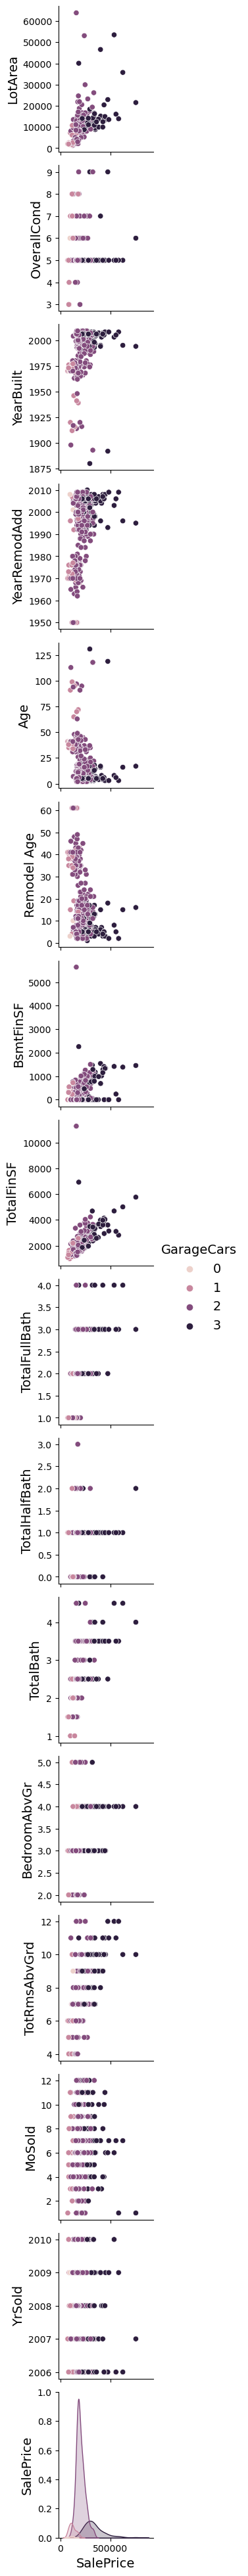

In [112]:
sns.pairplot(houses, hue='GarageCars', x_vars="SalePrice")

#### Relational Plot between TotalFinSF and SalePrice with hue set as BedroomAbvGr

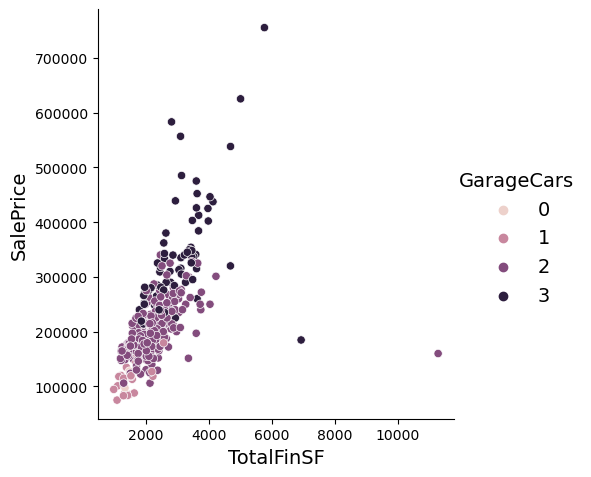

In [147]:
sns.relplot(x='TotalFinSF', y='SalePrice', hue='GarageCars', data=houses)
plt.savefig("RelationalPlot", bbox_inches='tight', pad_inches=0.5)

# Data Modeling

## Code Sources¶

### Ken Jee - Data Project from Scratch video series
[Video Link](https://www.youtube.com/watch?v=7O4dpR9QMIM)
[GitHub Repo Link](https://github.com/PlayingNumbers/ds_salary_proj)

In [117]:
clndf = pd.read_csv('cleantrain.csv')

# choose relevant columns
df_model = clndf[['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'TotalFinSF', 
               'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold', 'SalePrice']]

# get dummy data
df_dum = pd.get_dummies(df_model)

In [118]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('SalePrice', axis = 1)
y = df_dum.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Models
### Multiple Linear Regression

In [119]:
# statsmodels regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     46.95
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.75e-68
Time:                        19:13:33   Log-Likelihood:                -4377.8
No. Observations:                 357   AIC:                             8784.
Df Residuals:                     343   BIC:                             8838.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.581e+06   3.57e+06     -0.444      0.658   -8.59e+06    5.43e+06
LotArea               0.6362      0.548      1.161      0.246      -0.441       1.714
OverallCond        7999.5081   4504.161      1.776      0.077    -859.746    1.69e+04
YearBuilt             2.2664    346.367      0.007      0.995    -679.004     683.537
YearRemodAdd        835.6317    417.578      2.001      0.046      14.296    1656.968
TotalFinSF           22.4197      5.240      4.278      0.000      12.112      32.727
TotalBath           1.36e+04   6221.223      2.185      0.030    1359.337    2.58e+04
BedroomAbvGr       2.016e+04   5104.917      3.948      0.000    1.01e+04    3.02e+04
GarageCars         6.864e+04   6983.090      9.830      0.000    5.49e+04    8.24e+04
YrSold               51.2536   2118.461      0.024      0.981   -4115.557    4218.064
Foundation_BrkTil -3.099e+05   7.13e+05     -0.434      0.664   -1.71e+06    1.09e+06
Foundation_CBlock -3.294e+05   7.15e+05     -0.461      0.645   -1.74e+06    1.08e+06
Foundation_PConc  -3.188e+05   7.16e+05     -0.445      0.656   -1.73e+06    1.09e+06
Foundation_Slab   -3.007e+05   7.11e+05     -0.423      0.673    -1.7e+06     1.1e+06
Foundation_Wood   -3.225e+05   7.13e+05     -0.452      0.652   -1.73e+06    1.08e+06
==============================================================================
Omnibus:                      128.011   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2795.381
Skew:                           0.933   Prob(JB):                         0.00
Kurtosis:                      16.581   Cond. No.                     2.79e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
# sklearn linear model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-32982.85048422652

In [121]:
lm_l = Lasso(alpha=1)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.395e+10, tolerance: 1.884e+08
  model = cd_fast.enet_coordinate_descent(


-33008.11752103758

In [122]:
# Determine best alpha

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3)))
    
print(alpha)
print(error)

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+10, tolerance: 1.314e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+10, tolerance: 1.314e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]
[-33010.926172664884, -33010.88882758171, -33010.85148249979, -33010.81413741547, -33010.7767923322, -33010.73944724825, -33010.70210216763, -33010.664757082945, -33010.62741200234, -33010.59006691646, -33010.552721835906, -33010.51537674903, -33010.47803166847, -33010.44068658779, -33010.40334149915, -33010.36599

C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, tolerance: 1.306e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e+10, toleranc

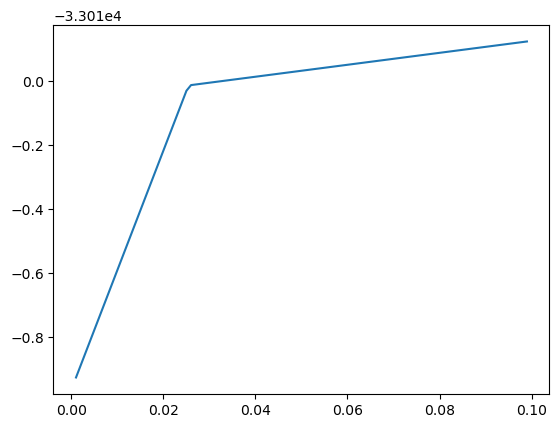

In [123]:
plt.plot(alpha,error)

In [124]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.099,-33009.875909


### Random Forest

In [125]:
# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-23446.394701754383

## Tune Models Using GridsearchCV

In [126]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'max_features':('auto', 'sqrt', 'log2'), }


In [127]:
gs = GridSearchCV(rf,parameters, scoring='neg_mean_absolute_error', cv=3)

In [128]:
gs.fit(X_train,y_train)

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\amber\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [130]:
gs.best_score_

-22706.110350877196

In [131]:
gs.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=60)

In [134]:
# Random Forest Regressor model with model tunings
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features='log2', n_estimators=60)

np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-23736.227777777774

In [135]:
# test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf =gs.best_estimator_.predict(X_test)

In [136]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

40137.496433003136

In [137]:
mean_absolute_error(y_test,tpred_lml)

40135.95368543981

In [138]:
mean_absolute_error(y_test,tpred_rf)

29417.5400462963

In [139]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

33988.34807575516

# Results
Basic results for our regression models to predict Sale Price on 
the Ames data.
| Model | Set | MAE |
|:---|:---|:---|
|Linear Regression|Training|32983|
|Linear Regression|Test|40137|
|Lasso Regression|Training|33008|
|Lasso Regression|Test|40136|
|Random Forest Regression|Training|23736|
|Random Forest Regression|Test|29418|

## Create API
As I was creating the API I ran into too many issues and ran out of time, so I just set up functions to input the data.  In the future I would like to create a functioning API for this project.

### Sources
    
Ken Jee: Creating a Data Science Project from Scratch (Part 6)
<https://www.youtube.com/watch?v=nUOh_lDMHOU>

github repo for this project: 
<https://github.com/PlayingNumbers/ds_salary_proj>
    
Article By Chris that we Followed to Create the API: 
<https://towardsdatascience.com/productionize-a-machine-learning-model-with-flask-and-heroku-8201260503d2>


In [141]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [142]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([217016.66666667])

In [143]:
list(X_test.iloc[1,:])

[12435.0,
 5.0,
 2001.0,
 2001.0,
 2153.0,
 2.5,
 3.0,
 2.0,
 2008.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

## Predict the sale price of the study house
Features to input:
Lot Area: 23958, Overall Cond:8, Year Built:1962, Year Remodeled: 2005, Total Finished Sqft: 2322, Bathrooms: 1.5, Bedrooms: 4, GarageCars: 2, Year Sold: 2011, Foundation: Poured Concrete

Result: 208,490

In [144]:
import flask
from flask import Flask, jsonify, request
import json
import numpy as np
import pickle

def load_models():
    file_name = "FlaskAPI/models/model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

def predict():    # input study house features
    # features = [['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalFinSF', 'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold','Foundation']]
    x = np.array([[23958, 8, 1962, 2005, 2322, 1.5, 4, 2, 2011, 0, 0,1,0,0]])
    #x = np.array(data_in),reshape(1,-1)    # load model
    model = load_models()
    prediction = model.predict(x)[0]    
    response = json.dumps({'response': prediction})
    return response, 200

predict()

C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


('{"response": 208489.61764705883}', 200)

## Predict the sale price of the study house with updates
Features to input: Lot Area: 23958, Overall Cond:8, Year Built:1962, Year Remodeled: 2011, Total Finished Sqft: 2822, Bathrooms: 2.5, Bedrooms: 5, GarageCars: 2, Year Sold: 2011, Foundation: Poured Concrete

Result: 266,028

In [145]:
def load_models():
    file_name = "FlaskAPI/models/model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

def predict():    # input study house with remodels features
    # features = [['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalFinSF', 'TotalBath', 'BedroomAbvGr', 'GarageCars', 'YrSold','Foundation']]
    x = np.array([[23958, 8, 1962, 2011, 2822, 2.5, 5, 2, 2011, 0, 0,1,0,0]])
    #x = np.array(data_in),reshape(1,-1)    # load model
    model = load_models()
    prediction = model.predict(x)[0]    
    response = json.dumps({'response': prediction})
    return response, 200

predict()

C:\Users\amber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


('{"response": 266027.64705882355}', 200)